In [11]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import shuffle

In [28]:
data = pd.read_csv('./student/student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [31]:
predict = "G3" # third grade

X = np.array(data.drop(predict, 1)) 
y = np.array(data[predict])


In [32]:
# split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
x_train

array([['GP', 'M', 15, ..., 8, 11, 11],
       ['GP', 'F', 15, ..., 2, 11, 13],
       ['GP', 'M', 18, ..., 0, 10, 10],
       ...,
       ['GP', 'M', 17, ..., 2, 9, 9],
       ['GP', 'F', 18, ..., 0, 14, 13],
       ['GP', 'M', 18, ..., 9, 16, 15]], dtype=object)

In [35]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
acc = linear.score(x_test, y_test)
acc

0.8419795719750284

In [37]:
print('Coef: ', linear.coef_)
print('Intercept: ', linear.intercept_)

Coef:  [ 0.14741033  0.98583728 -0.14087188 -0.27980204  0.03851523]
Intercept:  -1.597250119776188


In [41]:
predictions = linear.predict(x_test)

for p in range(len(predictions)):
    print('Pred: {} - Real: {} - Att: {}'.format(predictions[p],y_test[p],x_test[p]))

Pred: 8.403803521615972 - Real: 8 - Att: [10  9  3  0  2]
Pred: 12.930255503139232 - Real: 13 - Att: [13 13  2  0  2]
Pred: 9.78327323592964 - Real: 10 - Att: [11 10  2  1 12]
Pred: 15.34416105343458 - Real: 15 - Att: [16 15  2  0  2]
Pred: 14.07004156826307 - Real: 15 - Att: [15 14  3  0  2]
Pred: 7.719549601397205 - Real: 8 - Att: [ 9  8  2  0 10]
Pred: 4.165745866774664 - Real: 6 - Att: [6 5 2 0 6]
Pred: 13.44962907056925 - Real: 13 - Att: [14 13  1  0  8]
Pred: 8.320234612504413 - Real: 10 - Att: [9 9 2 0 0]
Pred: 11.491255665178974 - Real: 11 - Att: [12 11  1  0 16]
Pred: 11.951068800444094 - Real: 12 - Att: [12 12  2  0  6]
Pred: 12.168971129603324 - Real: 12 - Att: [12 12  1  0  8]
Pred: 16.32999833112749 - Real: 16 - Att: [16 16  2  0  2]
Pred: 12.778564181142677 - Real: 12 - Att: [13 12  1  0 20]
Pred: 6.143958877954909 - Real: 7 - Att: [7 7 3 0 6]
Pred: 9.453482221833832 - Real: 10 - Att: [10 10  2  0  0]
Pred: 5.401350125287601 - Real: 7 - Att: [7 6 1 0 5]
Pred: 14.972309936

In [42]:
# save model and plot
import matplotlib.pyplot as plt
import pickle


In [44]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)

In [45]:
pickle_in = open('studentmodel.pickle', 'rb')
model = pickle.load(pickle_in)

In [70]:
# save best model
best = 0 
for _ in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    if acc > best:
        best = acc
        with open('beststudentmodel.pickle', 'wb') as f:
            pickle.dump(linear, f)
print('best: ', best)

best:  0.9637345467693298


In [71]:
pickle_in = open('beststudentmodel.pickle', 'rb')
model = pickle.load(pickle_in)

In [72]:
model.score(x_test, y_test)

0.8667213245504629

In [73]:
# plotting
plt.style.use('ggplot')

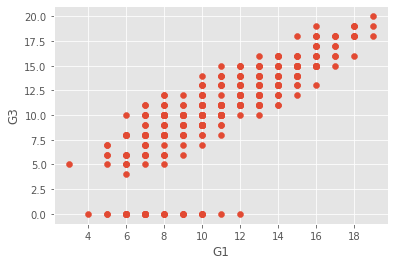

In [74]:
p = "G1"
plt.scatter(data[p], data["G3"])
plt.xlabel(p)
plt.ylabel("G3")
plt.show()